<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns
%matplotlib inline 

### 1. Import the data

In [3]:
df = pd.read_csv('ais.csv')
df.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

In [8]:
df.dtypes

Unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcBfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,202.0,101.500000,58.456537,1.00,51.2500,101.500,151.750,202.00
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00


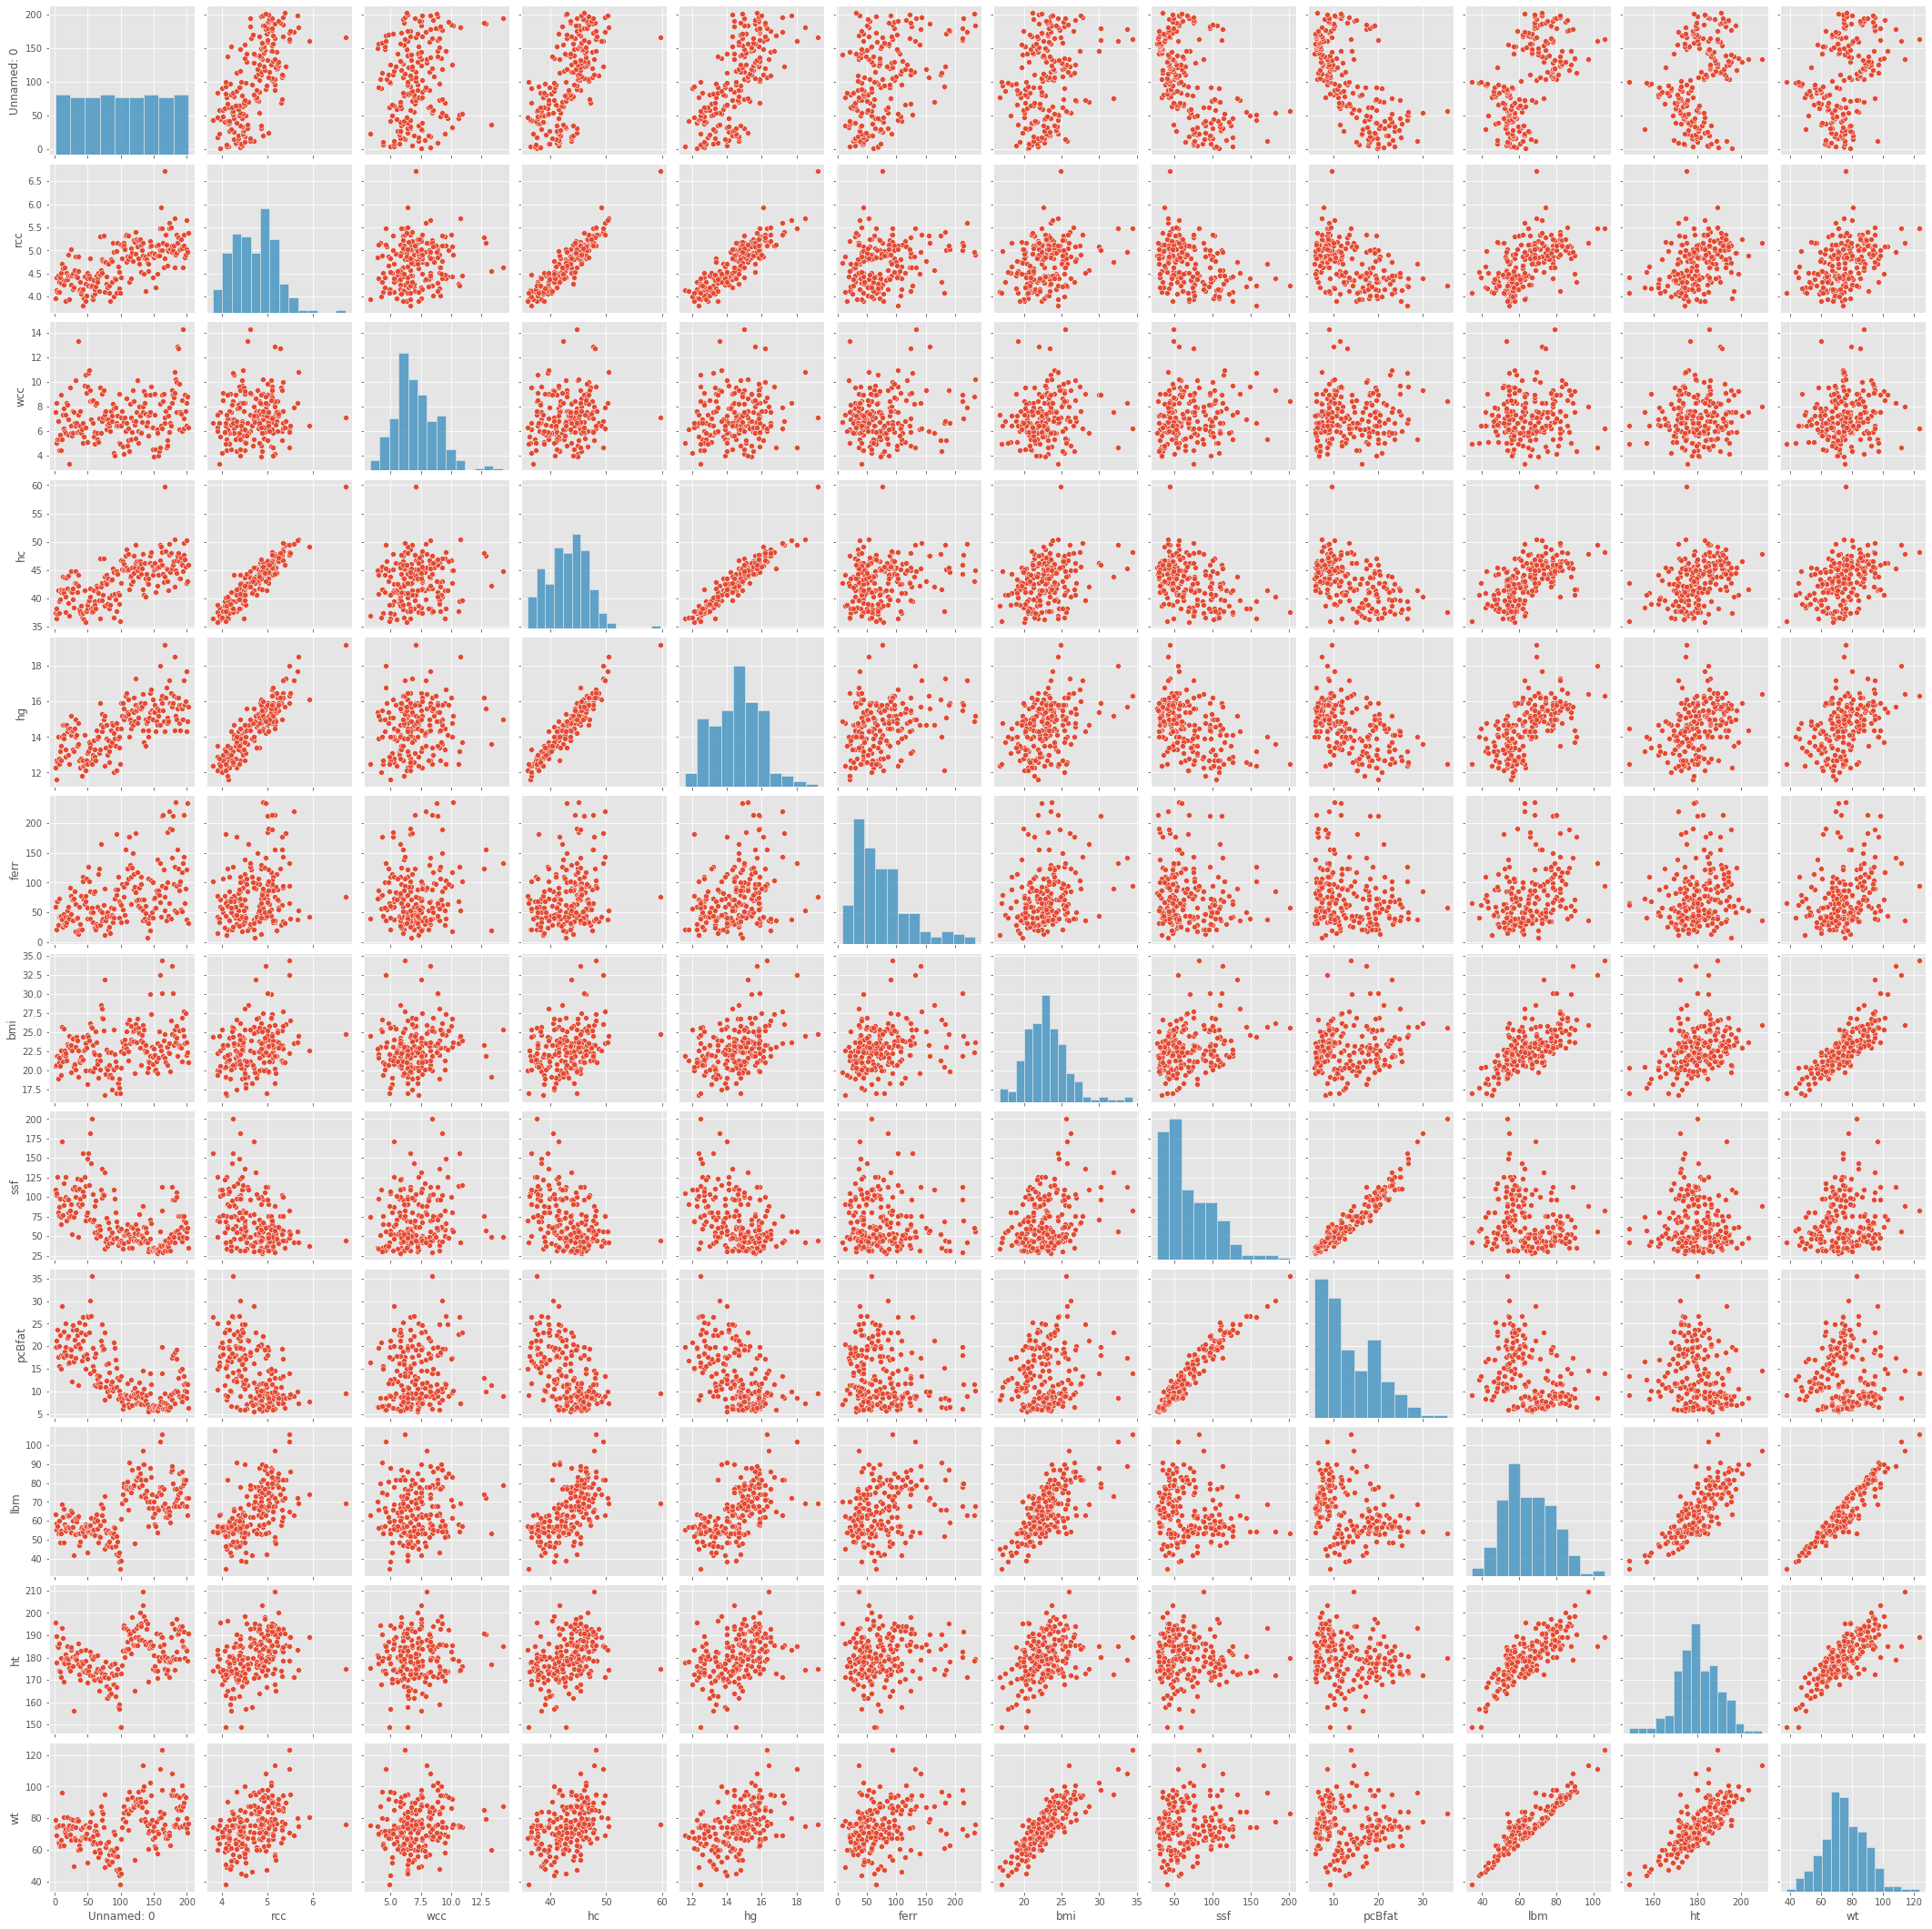

In [11]:
sns.pairplot(df)

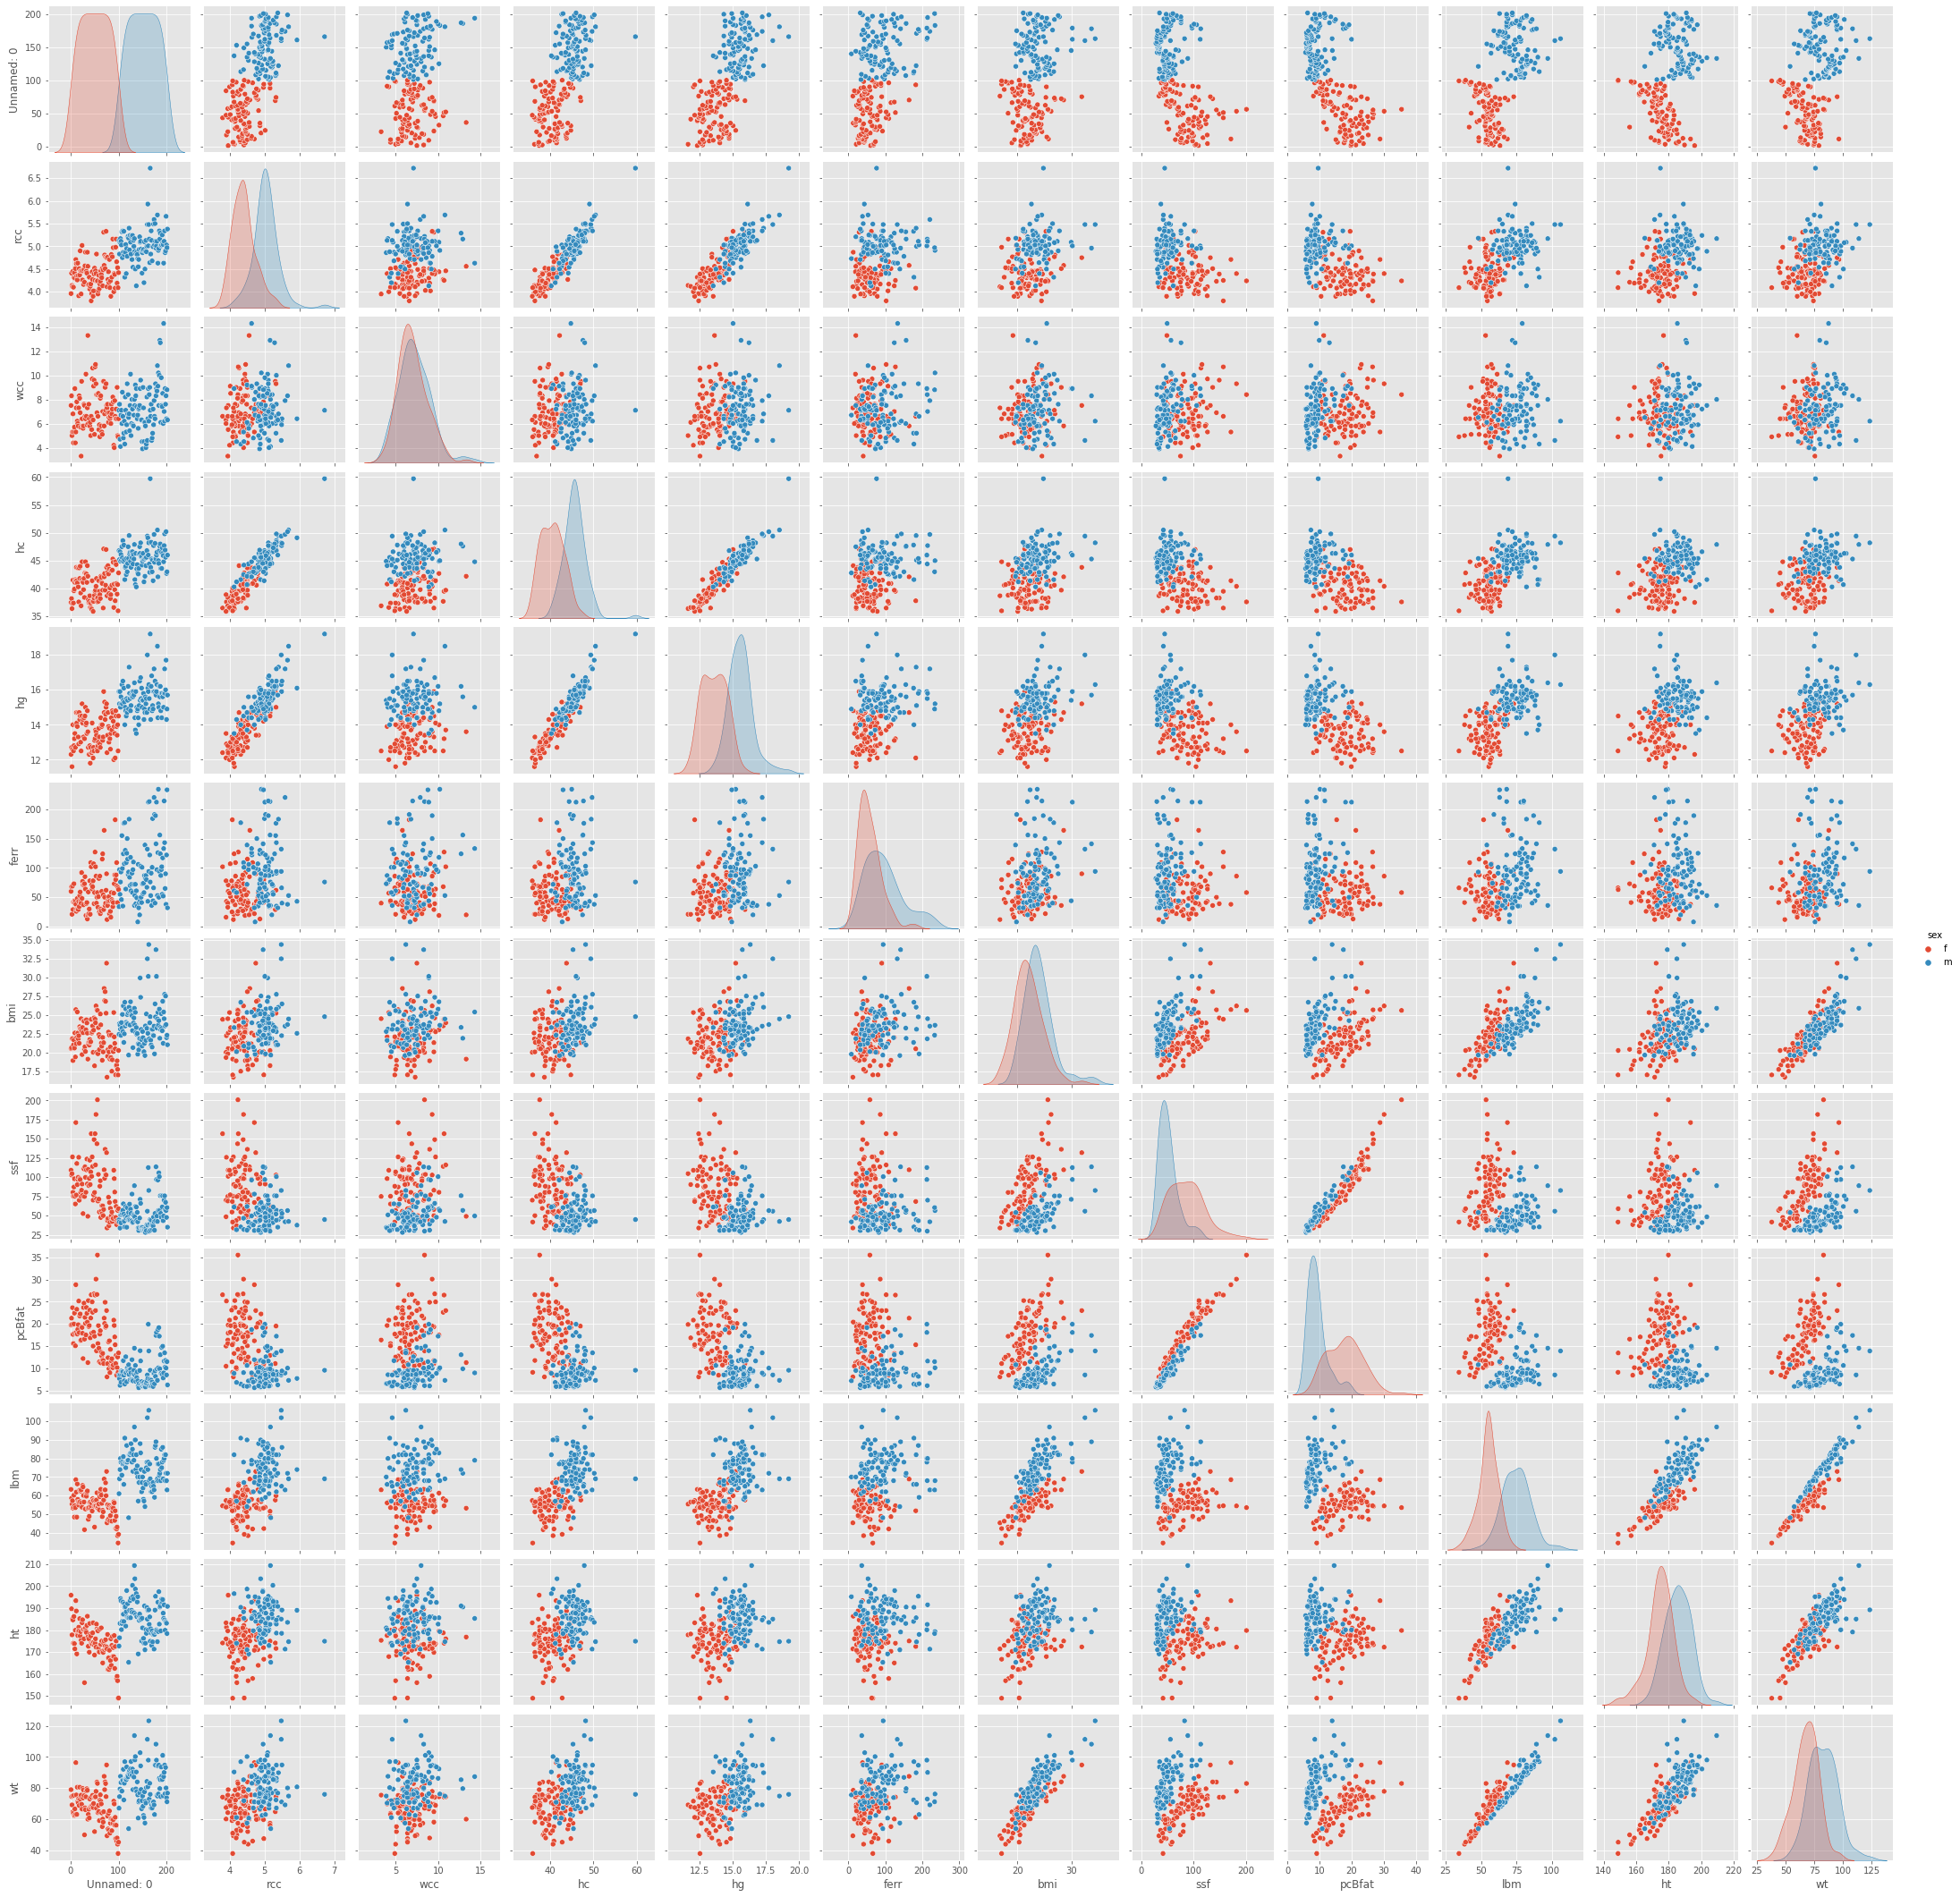

In [14]:
sns.pairplot(data=df, hue='sex')

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [15]:
# ANSWER
X = df.drop(['sex', 'sport'], axis = 1)

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()
Xss = ss.fit_transform(X)

In [19]:
Xss

array([[-1.72349742, -1.66056304,  0.21777075, ..., -0.11916982,
         1.62671873,  0.2801934 ],
       [-1.70634819, -0.67553837,  0.66323597, ..., -0.48502895,
         0.98822602, -0.04376463],
       [-1.68919896, -1.26655317, -1.17430808, ..., -0.72970203,
        -0.23726805, -0.42531519],
       ...,
       [ 1.68919896,  0.68160673, -0.39474394, ...,  0.23978631,
         0.30854023, -0.08695903],
       [ 1.70634819,  0.55027011,  0.94165174, ..., -0.14371383,
        -0.17547843, -0.28133385],
       [ 1.72349742,  1.44773703, -0.45042709, ...,  0.54658641,
         1.10150699,  0.12181392]])

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [20]:
# ANSWER
from sklearn.cluster import KMeans

In [23]:
k = 2  #2 clusters
k_mean = KMeans(n_clusters = k)
k_mean.fit(Xss)

KMeans(n_clusters=2)

### 5. Get the labels for the models

In [25]:
# ANSWER
labels = k_mean.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [26]:
# ANSWER
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xss)
    sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

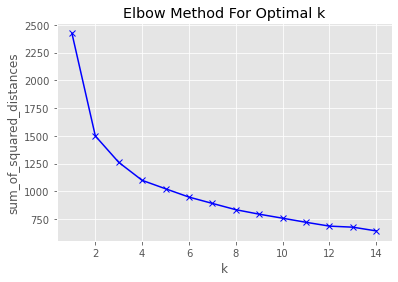

In [30]:
# ANSWER
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

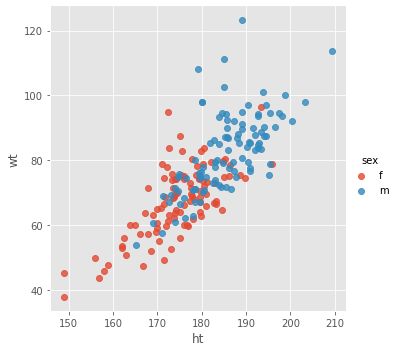

In [38]:
sns.lmplot(x='ht', y='wt', data=df, hue='sex', fit_reg=False)

In [39]:
ais_labels = df
ais_labels['labels'] = labels

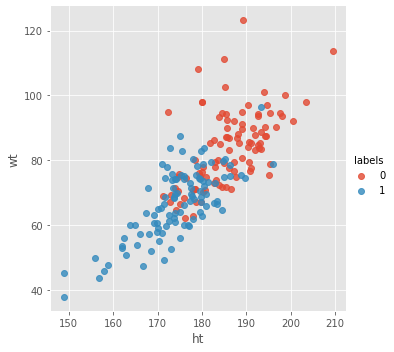

In [40]:
sns.lmplot(x='ht', y='wt', data=df, hue='labels', fit_reg=False)

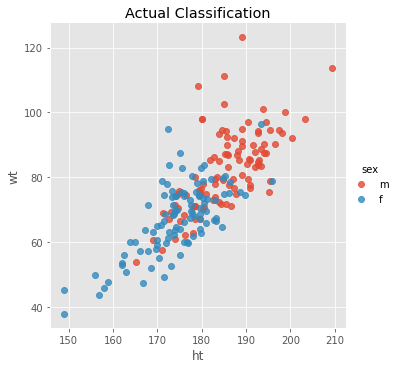

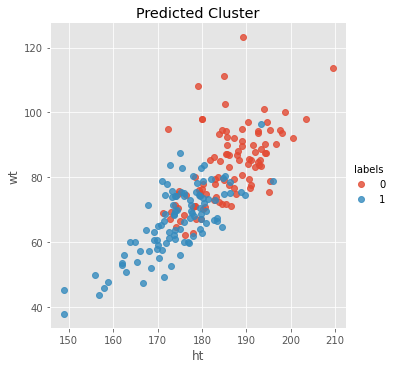

In [41]:
#length x groove_length
ais_labels = df
ais_labels['labels'] = labels

sns.lmplot(x='ht', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='ht', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

[[190.74722222  95.98888889]
 [186.06078431  81.26666667]
 [165.12413793  54.00344828]
 [177.16744186  69.59651163]]


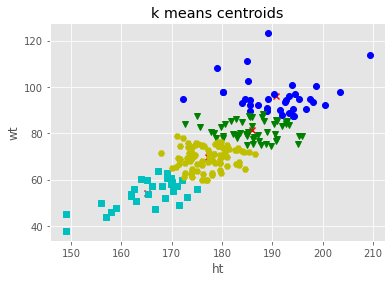

In [42]:
x1 = np.array(df['ht'])
x2 = np.array(df['wt'])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# KMeans algorithm 
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('ht')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



